# Import Libraries, EDA, Data Preprocessing

In [1]:
# import module
import pandas as pd
import re # Regular Expression
import string # For handling string


# read csv file
df = pd.read_csv("Data.csv",encoding='latin-1', names=["target","id","date","flag","user","text"])
df.to_csv("Data1.csv")

In [2]:
# Check top 5 row of dataframe
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Check bottom 5 row of dataframe
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
# Check if there is missing value
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
# check data info
df.info()

# drop irrelevant columns
df = df.drop(["id","date","flag","user"],axis=1)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [6]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text']=df['text'].apply(lambda x:expand_contractions(x))
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he cannot update his Facebook by...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it is not behaving at all..."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
# Remove links and mentions
df['text']=df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df['text']=df['text'].apply(lambda x: re.sub(r'@\S+', '', x))

In [8]:
# lowercase text
df['text']=df['text'].apply(lambda x: x.lower())
df

,target,text
0,0,"- awww, that is a bummer. you shoulda got d..."
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it is not behaving at all. i'm mad. why a..."
...,...,...
1599995,4,just woke up. having no school is the best fee...
1599996,4,thewdb.com - very cool to hear old walt interv...
1599997,4,are you ready for your mojo makeover? ask me f...
1599998,4,happy 38th birthday to my boo of alll time!!! ...


In [9]:
# Remove digits
df['text']=df['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
df

,target,text
0,0,"- awww, that is a bummer. you shoulda got d..."
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it is not behaving at all. i'm mad. why a..."
...,...,...
1599995,4,just woke up. having no school is the best fee...
1599996,4,thewdb.com - very cool to hear old walt interv...
1599997,4,are you ready for your mojo makeover? ask me f...
1599998,4,happy birthday to my boo of alll time!!! tupa...


In [10]:
# Remove punctuation
df['text']=df['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [11]:
# Remove extra spaces
df['text']=df['text'].apply(lambda x: re.sub(' +',' ',x))
df

,target,text
0,0,awww that is a bummer you shoulda got david c...
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all im mad why am i ...
...,...,...
1599995,4,just woke up having no school is the best feel...
1599996,4,thewdbcom very cool to hear old walt interview...
1599997,4,are you ready for your mojo makeover ask me fo...
1599998,4,happy birthday to my boo of alll time tupac am...


In [12]:
# # Change data of text column to string
# import nltk
# df['text'].astype(str)

In [13]:
%%time
import nltk

stopTokens = nltk.corpus.stopwords.words("english") # Where stop word get removed
stemmer = nltk.PorterStemmer()

def preprocess(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    # Filter out stop words & word stemming
    filtered_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stopTokens]  
    return ' '.join(filtered_tokens)  # Join the filtered words back into a sentence

df['tokens'] = df['text'].apply(preprocess)

Wall time: 6min 24s


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the text column from the dataset
text_data = df['text'].values

# Concatenate all the text into a single string
text = ' '.join(text_data)

# Create word cloud object 
wordCloud = WordCloud().generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [14]:
df

,target,text,tokens
0,0,awww that is a bummer you shoulda got david c...,awww bummer shoulda got david carr third day
1,0,is upset that he cannot update his facebook by...,upset update facebook texting might cry result...
2,0,i dived many times for the ball managed to sa...,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,no it is not behaving at all im mad why am i ...,behaving im mad see
...,...,...,...
1599995,4,just woke up having no school is the best feel...,woke school best feeling ever
1599996,4,thewdbcom very cool to hear old walt interview...,thewdbcom cool hear old walt interview â «
1599997,4,are you ready for your mojo makeover ask me fo...,ready mojo makeover ask detail
1599998,4,happy birthday to my boo of alll time tupac am...,happy birthday boo alll time tupac amaru shakur


# Logistic Regression
## Lim Shi Han TP054993

In [16]:
%%time

## Logistic Regression Implementation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into training and test sets
X = df['tokens']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
logreg_model = LogisticRegression(solver='sag', max_iter=1000, random_state = 42)
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159494
           4       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Wall time: 1min 19s


In [20]:
%%time
## if no choice, then use this to explain my gridsearch
## best result is solver="lbfgs", but the result is very similar to solver="sag" and solver="sag" has very short running time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from numpy import arange


# Split the dataset into training and test sets
X = df['tokens']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model_LR = LogisticRegression()
logreg_model = LogisticRegression(solver='sag', max_iter=1000, random_state = 42)
print(logreg_model.get_params())
 
parameters = dict()
parameters['solver'] = ['sag', 'newton-cg', 'lbfgs', 'saga'] # Optimization
 
## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR = GridSearchCV(estimator=logreg_model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
 
## Lastly, finding the best parameters.
grid_search_LR.fit(X_train_tfidf, y_train)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_
print()
print(best_parameters_LR)
print(best_score_LR)
 
y_pred_1 = grid_search_LR.predict(X_test_tfidf)
 
# Get the accuracy score
lr_acc = accuracy_score(y_test, y_pred_1)
lr_pre = precision_score(y_test, y_pred_1, average='micro')
lr_recall = recall_score(y_test, y_pred_1, average='micro')
lr_f1 = f1_score(y_test, y_pred_1, average='micro')
 
print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
print("LR - Precision: {:.3f}.".format(lr_pre))
print("LR - Recall: {:.3f}.".format(lr_recall))
print("LR - F1 Score: {:.3f}.".format(lr_f1))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred_1))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'solver': 'lbfgs'}
0.77656171875

LR - Accuracy: 0.777.
LR - Precision: 0.777.
LR - Recall: 0.777.
LR - F1 Score: 0.777.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77    159494
           4       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Wall time: 16min 36s


In [39]:
%%time

## rebuild by changing hyperparameter of solver from "sag" to "lbfgs"

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into training and test sets
X = df['tokens']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 42)
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_tfidf)

lr_acc = accuracy_score(y_test, predictions)
lr_pre = precision_score(y_test, predictions, average='micro')
lr_recall = recall_score(y_test, predictions, average='micro')
lr_f1 = f1_score(y_test, predictions, average='micro')

# Evaluation
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159494
           4       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Wall time: 6min 24s


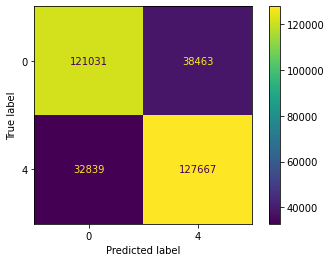

In [40]:
## Confusion Matrix for evaluation of Logistic Regression Model
## Based on tuned model

from sklearn import metrics
import matplotlib.pyplot as plt

# Compute confusion matrix
logreg_cm = metrics.confusion_matrix(y_test, predictions) 
logreg_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = logreg_cm, display_labels = [0, 4])

logreg_cm_display.plot()
plt.show()

In [ ]:
# # should be the best code for logistic regression gridsearch
# # runtime very long, have changed max_iter from 1000 to 10000 still cant work



# %%time 

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import GridSearchCV
# from numpy import arange


# # Split the dataset into training and test sets
# X = df['tokens']
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # model_LR = LogisticRegression()
# logreg_model = LogisticRegression(solver='sag', max_iter=10000, random_state = 42)
# print(logreg_model.get_params())
 
# parameters = dict()
# parameters['C'] = [0.01, 0.1, 1, 10, 100] # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
# parameters['solver'] = ['sag', 'newton-cg', 'lbfgs', 'saga'] # Optimization
# parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
 
# ## Building Grid Search algorithm with cross-validation and acc score.
# grid_search_LR = GridSearchCV(estimator=logreg_model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
 
# ## Lastly, finding the best parameters.
# grid_search_LR.fit(X_train_tfidf, y_train)
# best_parameters_LR = grid_search_LR.best_params_  
# best_score_LR = grid_search_LR.best_score_
# print()
# print(best_parameters_LR)
# print(best_score_LR)
 
# y_pred_1 = grid_search_LR.predict(X_test_tfidf)
 
# # Get the accuracy score
# lr_acc = accuracy_score(y_test, y_pred_1)
# lr_pre = precision_score(y_test, y_pred_1, average='micro')
# lr_recall = recall_score(y_test, y_pred_1, average='micro')
# lr_f1 = f1_score(y_test, y_pred_1, average='micro')
 
# print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
# print("LR - Precision: {:.3f}.".format(lr_pre))
# print("LR - Recall: {:.3f}.".format(lr_recall))
# print("LR - F1 Score: {:.3f}.".format(lr_f1))
# print ('\n Clasification Report:\n', classification_report(y_test,y_pred_1))

# Naive Bayes
## Joshua Rohan TP055972

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['target'], test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create an instance of the Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train_vec, y_train)

# Predict the sentiments for the testing data
y_pred = classifier.predict(X_test_vec)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.76100625
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77    159494
           4       0.77      0.74      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

# Create an instance of the Naive Bayes classifier
classifier = MultinomialNB()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_vec, y_train)

# Print the best hyperparameters and results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 10.0, 'fit_prior': False}
Best Score: 0.7635546875


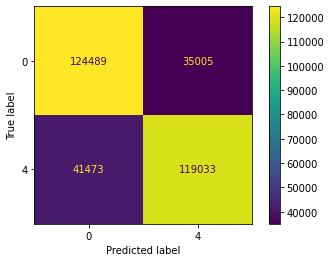

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_vec)

# Compute the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(nb_cm, display_labels=[0,4])
cm_display.plot()
plt.show() 

# LinearSVC
## Tejeswara Sai Reddy Karri TP062689

In [ ]:
df.columns

In [ ]:
import numpy as np

X = df['tokens']

y = df['target']

X[15995:15999]

In [52]:
%%time

## Model Training

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

tfidfvector = TfidfVectorizer()

X_train_Tfidf = tfidfvector.fit_transform(X_train)
X_test_Tfidf = tfidfvector.transform(X_test)

# Create the LinearSVC model with initial hyperparameters
classify = svm.LinearSVC(C=0.1, dual=False, penalty='l2', max_iter=1000)
classify.fit(X_train_Tfidf, y_train)

y_predict = classify.predict(X_test_Tfidf)
print("SVM Accuracy Percentage is", accuracy_score(y_predict, y_test) * 100)
print(classification_report(y_test, y_predict))

SVM Accuracy Percentage is 77.705625
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160148
           4       0.77      0.80      0.78    159852

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Wall time: 2min 3s


In [53]:
%%time

## Grid Search

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(classify, param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train_Tfidf, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test_Tfidf, y_test)
print("Test Score: ", test_score)

Best Hyperparameters:  {'C': 0.1}
Best Score:  0.7757437500000001
Test Score:  0.77705625
Wall time: 46min 30s


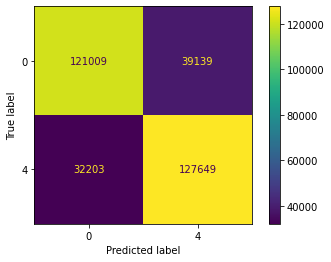

In [54]:
## Confusion Matrix for evaluation of SVC Model
## Based on tuned model
from sklearn import metrics
import matplotlib.pyplot as plt

# Compute confusion matrix
svc_cm = metrics.confusion_matrix(y_test, y_predict) 
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = [0, 4])

svc_cm_display.plot()
plt.show()